# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto deseado
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | hayma'
City not found. Skipping...
Processing Record 4 of Set 1 | bamboo flat
Processing Record 5 of Set 1 | chauk
Processing Record 6 of Set 1 | porto novo
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | thinadhoo
Processing Record 10 of Set 1 | moyynkum
Processing Record 11 of Set 1 | bac lieu
Processing Record 12 of Set 1 | kattivakkam
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | plouzane
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | as samawah
Processing Record 17 of Set 1 | poronaysk
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | egilsstadir
Processing Record 21 of Set 1 | lib
Processing Record 22 of 

Processing Record 37 of Set 4 | kerikeri
Processing Record 38 of Set 4 | jurilovca
Processing Record 39 of Set 4 | miracema do tocantins
Processing Record 40 of Set 4 | taoudenni
Processing Record 41 of Set 4 | cockburn town
Processing Record 42 of Set 4 | eldorado
Processing Record 43 of Set 4 | pauini
Processing Record 44 of Set 4 | tsiombe
Processing Record 45 of Set 4 | mirpur sakro
Processing Record 46 of Set 4 | lihue
Processing Record 47 of Set 4 | remire-montjoly
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | clanton
Processing Record 0 of Set 5 | katima mulilo
Processing Record 1 of Set 5 | zhezqazghan
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | zuwarah
Processing Record 4 of Set 5 | kosti
Processing Record 5 of Set 5 | holualoa
Processing Record 6 of Set 5 | cabedelo
Processing Record 7 of Set 5 | aykhal
Processing Record 8 of Set 5 | east london
Processing Record 9 of Set 5 | sydney mines
Processing Record 10 of Set 5 | wal

Processing Record 29 of Set 8 | turpan
Processing Record 30 of Set 8 | santa ana
Processing Record 31 of Set 8 | kingston
Processing Record 32 of Set 8 | 'izbat al burj
City not found. Skipping...
Processing Record 33 of Set 8 | axim
Processing Record 34 of Set 8 | soure
Processing Record 35 of Set 8 | kirakira
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | sinop
Processing Record 38 of Set 8 | dhidhdhoo
Processing Record 39 of Set 8 | broken hill
Processing Record 40 of Set 8 | olyokminsk
Processing Record 41 of Set 8 | wesley
Processing Record 42 of Set 8 | oakland
Processing Record 43 of Set 8 | marquelia
Processing Record 44 of Set 8 | umm ruwaba
Processing Record 45 of Set 8 | huarmey
Processing Record 46 of Set 8 | salida
Processing Record 47 of Set 8 | gao
Processing Record 48 of Set 8 | kenai
Processing Record 49 of Set 8 | suntar
Processing Record 0 of Set 9 | saudarkrokur
Processing Record 1 of Set 9 | colac
Processing Record 2 of Set 9 |

Processing Record 18 of Set 12 | tobruk
Processing Record 19 of Set 12 | timberlake
Processing Record 20 of Set 12 | poli
Processing Record 21 of Set 12 | lompoc
Processing Record 22 of Set 12 | fonadhoo
City not found. Skipping...
Processing Record 23 of Set 12 | sitampiky
City not found. Skipping...
Processing Record 24 of Set 12 | shepherdsville
Processing Record 25 of Set 12 | lenger
Processing Record 26 of Set 12 | fortuna
Processing Record 27 of Set 12 | mezhdurechensk
Processing Record 28 of Set 12 | aylesbury
Processing Record 29 of Set 12 | cidreira
Processing Record 30 of Set 12 | saint-pierre-d'oleron
City not found. Skipping...
Processing Record 31 of Set 12 | mana
Processing Record 32 of Set 12 | yen vinh
Processing Record 33 of Set 12 | galveston
Processing Record 34 of Set 12 | barcelona
Processing Record 35 of Set 12 | la passe
Processing Record 36 of Set 12 | jeremoabo
Processing Record 37 of Set 12 | sydney
Processing Record 38 of Set 12 | laguna
Processing Record 39 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto deseado,-47.7503,-65.8938,8.07,57,44,7.36,AR,1690738100
1,waitangi,-43.9535,-176.5597,8.23,78,88,8.13,NZ,1690738101
2,bamboo flat,11.7000,92.7167,29.05,84,75,7.72,IN,1690738101
3,chauk,20.8833,94.8167,27.26,83,95,7.23,MM,1690738101
4,porto novo,6.4965,2.6036,27.90,88,100,1.70,BJ,1690738101


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("H:/Training/DU Boot Camp/Module 6 Challenge Assignment 07262023/Starter_Code/output_data/cities.csv")

In [8]:
# Read saved data
city_data_df = pd.read_csv("H:/Training/DU Boot Camp/Module 6 Challenge Assignment 07262023/Starter_Code/output_data/cities.csv")

# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,puerto deseado,-47.7503,-65.8938,8.07,57,44,7.36,AR,1690738100
1,1,waitangi,-43.9535,-176.5597,8.23,78,88,8.13,NZ,1690738101
2,2,bamboo flat,11.7000,92.7167,29.05,84,75,7.72,IN,1690738101
3,3,chauk,20.8833,94.8167,27.26,83,95,7.23,MM,1690738101
4,4,porto novo,6.4965,2.6036,27.90,88,100,1.70,BJ,1690738101


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

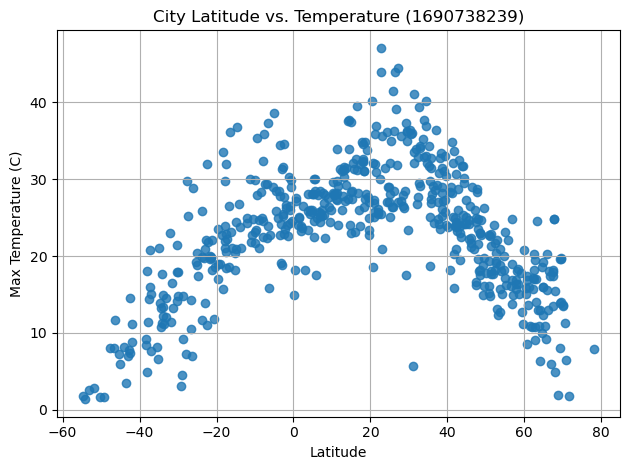

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({city_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("H:/Training/DU Boot Camp/Module 6 Challenge Assignment 07262023/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

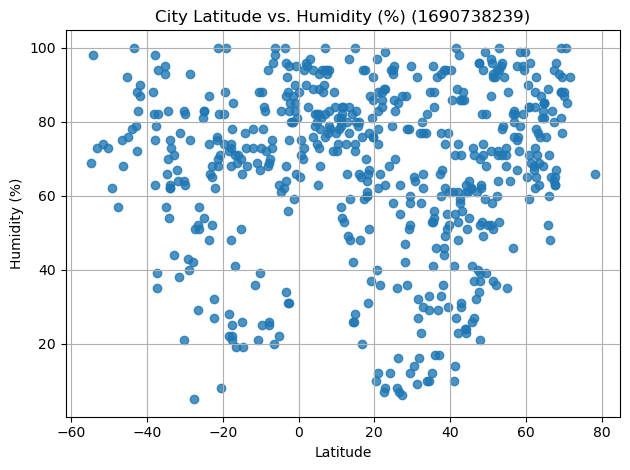

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({city_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("H:/Training/DU Boot Camp/Module 6 Challenge Assignment 07262023/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

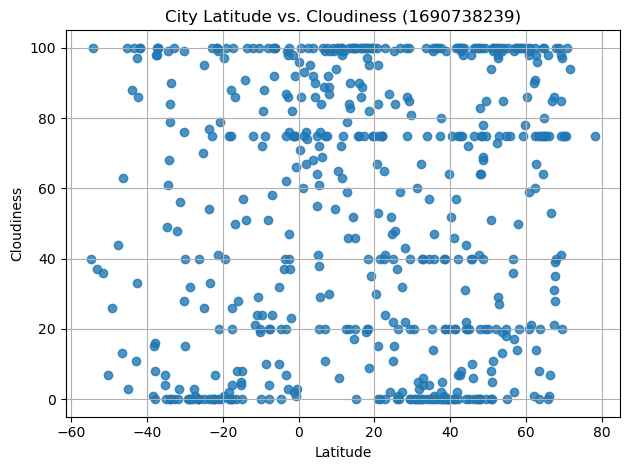

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({city_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("H:/Training/DU Boot Camp/Module 6 Challenge Assignment 07262023/Starter_Code/output_data//Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

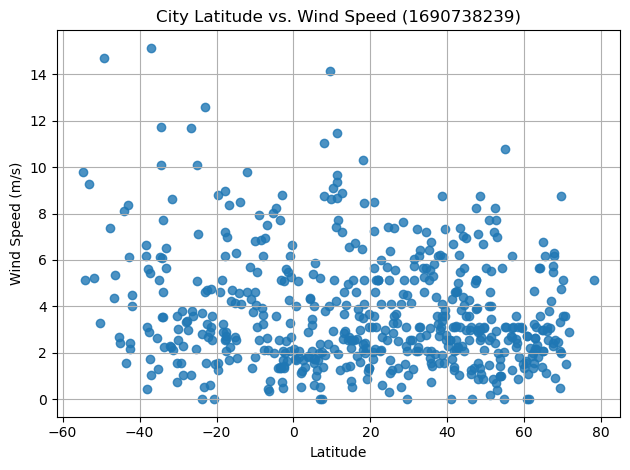

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({city_date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("H:/Training/DU Boot Camp/Module 6 Challenge Assignment 07262023/Starter_Code/output_data//Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NameError: name 'x_values' is not defined

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]
# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,bamboo flat,11.7000,92.7167,29.05,84,75,7.72,IN,1690738101
3,3,chauk,20.8833,94.8167,27.26,83,95,7.23,MM,1690738101
4,4,porto novo,6.4965,2.6036,27.90,88,100,1.70,BJ,1690738101
7,7,thinadhoo,0.5333,72.9333,27.61,71,100,1.70,MV,1690738102
8,8,moyynkum,44.2914,72.9469,30.15,23,0,4.06,KZ,1690738102


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,puerto deseado,-47.7503,-65.8938,8.07,57,44,7.36,AR,1690738100
1,1,waitangi,-43.9535,-176.5597,8.23,78,88,8.13,NZ,1690738101
5,5,grytviken,-54.2811,-36.5092,1.40,98,100,5.12,GS,1690738102
6,6,puerto natales,-51.7236,-72.4875,2.85,74,36,5.23,CL,1690738102
11,11,margaret river,-33.9500,115.0667,13.34,75,79,3.53,AU,1690738103


###  Temperature vs. Latitude Linear Regression Plot

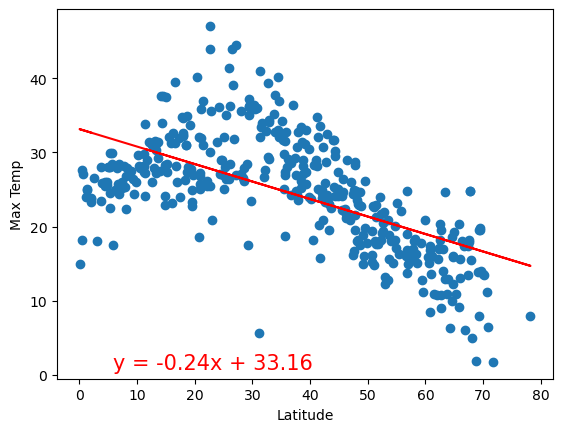

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

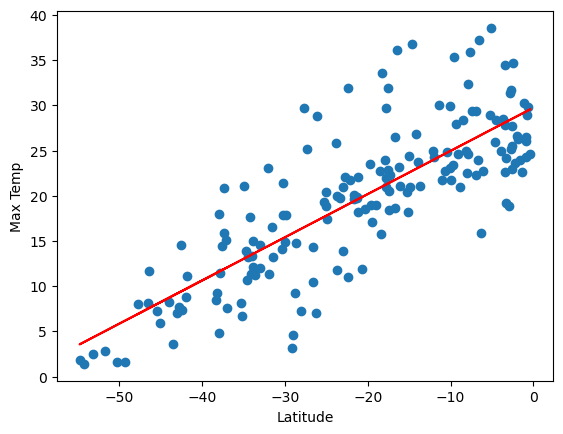

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

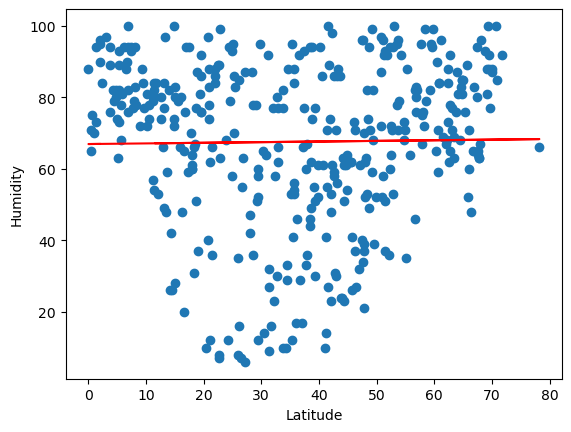

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

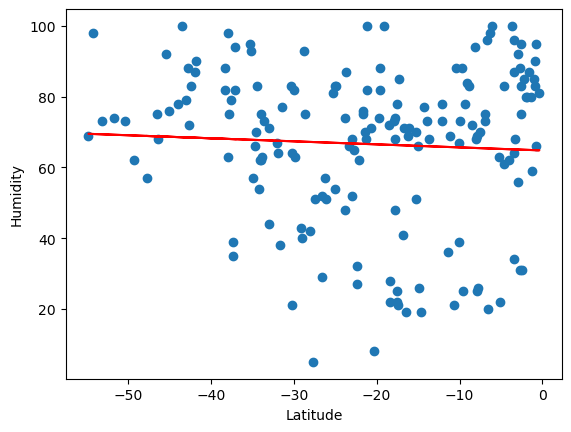

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

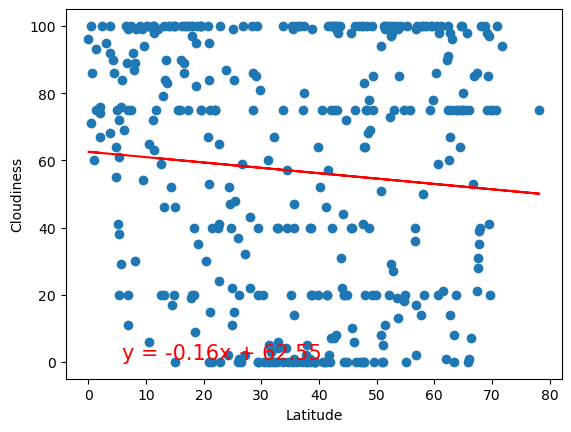

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

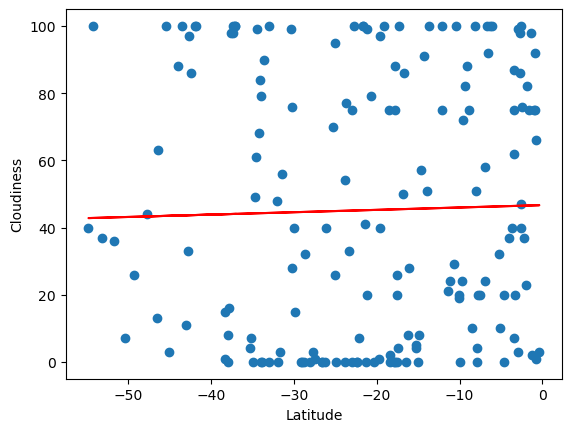

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

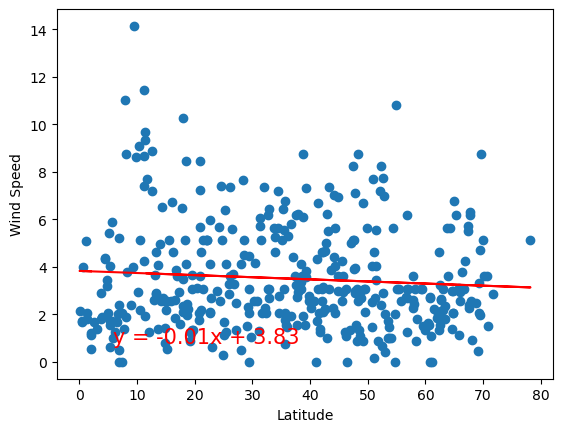

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

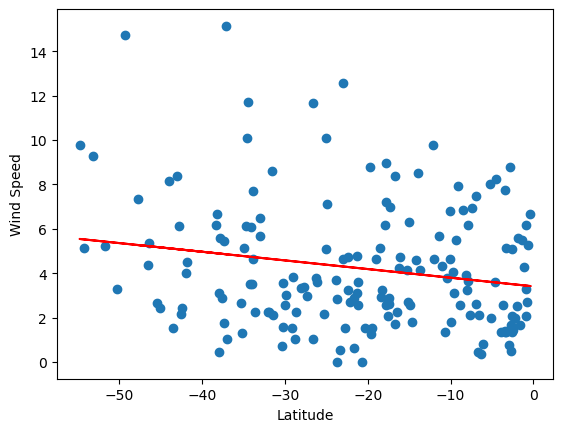

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE